In [1]:
# import libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
# Prevent from truncating

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# importing the data

df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.duplicated().sum()

121

In [5]:
df.head(1)

# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,bestech altura,sector 79,1.85,8604.0,2150.0,Super Built up area 2150(199.74 sq.m.),3,4,3+,servant room,11.0,North,0 to 1 Year Old,"['Sapphire 83 Mall', 'NH -8', 'Golf Course Extension Road', 'Mount Olympus Junior School', 'Amity University Gurugram', 'Miracles Apollo Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'Savoy Suites, Manesar', 'Golden Greens Golf & Resorts']","['5 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


## 1. areaWithType

In [6]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
225,1.60,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.)
2638,1.00,1180.0,Carpet area: 1180 (109.63 sq.m.)
869,2.51,2093.0,Super Built up area 2093(194.45 sq.m.)
3040,4.25,1620.0,Plot area 204(170.57 sq.m.)Built Up area: 200 sq.yards (167.23 sq.m.)Carpet area: 180 sq.yards (150.5 sq.m.)
2067,0.35,576.0,Super Built up area 576(53.51 sq.m.)


In [7]:
# This function extracts the Super Built up area

def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area

def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed

def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed

df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)


# Extract Built Up area and convert to sqft if needed

df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)


# Extract Carpet area and convert to sqft if needed

df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
103,0.75,flat,1145.0,Super Built up area 1145(106.37 sq.m.)Built Up area: 1100 sq.ft. (102.19 sq.m.),1145.0,1100.0,NaN
2042,10.85,house,2844.0,Plot area 316(264.22 sq.m.),NaN,NaN,NaN
2602,0.86,flat,1760.0,Super Built up area 1760(163.51 sq.m.),1760.0,NaN,NaN
3754,2.25,flat,2100.0,Carpet area: 2100 (195.1 sq.m.),NaN,NaN,2100.0
2494,1.95,flat,1219.0,Super Built up area 1261(117.15 sq.m.),1261.0,NaN,NaN


In [12]:
df.duplicated().sum()

121

In [13]:
# checking for rows in how many rows we have value of all three type of area 

df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
# extract all the rows where we have plot area

df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
5,9.00,house,4235.0,Plot area 5605(520.72 sq.m.)Built Up area: 5200 sq.ft. (483.1 sq.m.)Carpet area: 4235 sq.ft. (393.44 sq.m.),NaN,5200.0,4235.0
9,7.00,house,5400.0,Plot area 600(501.68 sq.m.),NaN,NaN,NaN
28,1.95,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
30,7.80,house,3370.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
35,6.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN


In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [16]:
# checking for all three type of missing area 

all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [17]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,7.00,house,5400.0,Plot area 600(501.68 sq.m.),NaN,NaN,NaN
28,1.95,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
30,7.80,house,3370.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
35,6.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
45,4.45,house,1265.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [19]:
# Function to extract plot area from 'areaWithType' column

def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [20]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [21]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,7.00,house,5400.0,Plot area 600(501.68 sq.m.),NaN,600.00,NaN
28,1.95,house,1440.0,Plot area 160(133.78 sq.m.),NaN,160.00,NaN
30,7.80,house,3370.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
35,6.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
45,4.45,house,1265.0,Plot area 150(125.42 sq.m.),NaN,150.00,NaN
71,7.25,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
84,2.10,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
85,5.50,house,1440.0,Plot area 160(133.78 sq.m.),NaN,160.00,NaN
96,NaN,house,NaN,Plot area 1000(92.9 sq.m.),NaN,1000.00,NaN
109,0.80,house,100.0,Plot area 100(9.29 sq.m.),NaN,100.00,NaN


In [22]:
# convert the unit in one standard unit 

def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [23]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [24]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,7.00,house,5400.0,Plot area 600(501.68 sq.m.),NaN,5400.00,NaN
28,1.95,house,1440.0,Plot area 160(133.78 sq.m.),NaN,1440.00,NaN
30,7.80,house,3370.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
35,6.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.00,NaN
45,4.45,house,1265.0,Plot area 150(125.42 sq.m.),NaN,150.00,NaN
71,7.25,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
84,2.10,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
85,5.50,house,1440.0,Plot area 160(133.78 sq.m.),NaN,1440.00,NaN
96,NaN,house,NaN,Plot area 1000(92.9 sq.m.),NaN,1000.00,NaN
109,0.80,house,100.0,Plot area 100(9.29 sq.m.),NaN,100.00,NaN


In [25]:
# update the original dataframe
df.update(all_nan_df)

In [26]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [27]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,bestech altura,sector 79,1.85,8604.0,2150.0,Super Built up area 2150(199.74 sq.m.),3,4,3+,servant room,11.0,North,0 to 1 Year Old,"['Sapphire 83 Mall', 'NH -8', 'Golf Course Extension Road', 'Mount Olympus Junior School', 'Amity University Gurugram', 'Miracles Apollo Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'Savoy Suites, Manesar', 'Golden Greens Golf & Resorts']","['5 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2150.0,NaN,NaN
1,flat,rof ananda,sector 95,0.46,6318.0,728.0,Carpet area: 728 (67.63 sq.m.),2,2,2,study room,11.0,North-West,0 to 1 Year Old,"['Metro', 'Dwarka Expressway', 'Rajeev Chowk', 'NH8', 'KMP Expressway', 'IMT Manesar', 'ISBT', 'Hero Honda Chowk', 'IGI Airport', 'Railway Station', 'Proposed Diplomatic enclave', 'Flava', 'Spicy Salsa', ""Nihar's Cafe"", 'Cheeni singh restaurant']",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,728.0
2,house,independent,sector 9,0.22,7407.0,297.0,Carpet area: 33 (27.59 sq.m.),2,2,2,not available,1.0,NaN,undefined,NaN,NaN,NaN,NaN,NaN,33.0
3,flat,umang monsoon breeze,sector 78,0.95,5491.0,1730.0,Built Up area: 1730 (160.72 sq.m.),3,3,2,not available,9.0,East,1 to 5 Year Old,"['Proposed Metro Station', 'Mahapal Shing', 'National Highway 8', 'IGD Primary Health Care', 'HDFC Bank', 'PCL Logistics', 'JW Mariott']","['3 Fan', '1 Exhaust Fan', '2 Geyser', '7 Light', '1 Chimney', '1 Modular Kitchen', '3 Wardrobe', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,1730.0,NaN
4,flat,tata primanti,sector 72,4.00,13769.0,2905.0,Super Built up area 2905(269.88 sq.m.),4,5,2,servant room,7.0,South-East,5 to 10 Year Old,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']",[],"['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2905.0,NaN,NaN


## 2.additionalRoom

In [28]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [29]:
# additional room
# List of new columns to be created

new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']


# Populate the new columns based on the "additionalRoom" column

for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [30]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3072,servant room,0,1,0,0,0
2295,not available,0,0,0,0,0
219,not available,0,0,0,0,0
667,"pooja room,store room",0,0,1,1,0
1321,servant room,0,1,0,0,0


In [31]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,bestech altura,sector 79,1.85,8604.0,2150.0,Super Built up area 2150(199.74 sq.m.),3,4,3+,servant room,11.0,North,0 to 1 Year Old,"['Sapphire 83 Mall', 'NH -8', 'Golf Course Extension Road', 'Mount Olympus Junior School', 'Amity University Gurugram', 'Miracles Apollo Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'Savoy Suites, Manesar', 'Golden Greens Golf & Resorts']","['5 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2150.0,NaN,NaN,0,1,0,0,0
1,flat,rof ananda,sector 95,0.46,6318.0,728.0,Carpet area: 728 (67.63 sq.m.),2,2,2,study room,11.0,North-West,0 to 1 Year Old,"['Metro', 'Dwarka Expressway', 'Rajeev Chowk', 'NH8', 'KMP Expressway', 'IMT Manesar', 'ISBT', 'Hero Honda Chowk', 'IGI Airport', 'Railway Station', 'Proposed Diplomatic enclave', 'Flava', 'Spicy Salsa', ""Nihar's Cafe"", 'Cheeni singh restaurant']",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,728.0,1,0,0,0,0
2,house,independent,sector 9,0.22,7407.0,297.0,Carpet area: 33 (27.59 sq.m.),2,2,2,not available,1.0,NaN,undefined,NaN,NaN,NaN,NaN,NaN,33.0,0,0,0,0,0
3,flat,umang monsoon breeze,sector 78,0.95,5491.0,1730.0,Built Up area: 1730 (160.72 sq.m.),3,3,2,not available,9.0,East,1 to 5 Year Old,"['Proposed Metro Station', 'Mahapal Shing', 'National Highway 8', 'IGD Primary Health Care', 'HDFC Bank', 'PCL Logistics', 'JW Mariott']","['3 Fan', '1 Exhaust Fan', '2 Geyser', '7 Light', '1 Chimney', '1 Modular Kitchen', '3 Wardrobe', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,1730.0,NaN,0,0,0,0,0
4,flat,tata primanti,sector 72,4.00,13769.0,2905.0,Super Built up area 2905(269.88 sq.m.),4,5,2,servant room,7.0,South-East,5 to 10 Year Old,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']",[],"['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2905.0,NaN,NaN,0,1,0,0,0


## 3.agePossession

In [32]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Dec 2025                 7
Jun 2024                 7
Aug 2023                 7
Nov 2023                 5
Aug 2024                 4
Sep 2023                 4
By 2025                  4
Jul 2024                 4
Oct 2023                 4
Feb 2024                 3
Jan 2025                 3
May 2024                 3
Nov 2024                 3
Apr 2026                 2
Oct 2025                 2
Jun 2027                 2
Jan 2026                 2
Jul 2025                 2
Dec 2026                 2
Aug 2025                 2
Jul 2027                 2
By 2027       

In [33]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [34]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [35]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [36]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,bestech altura,sector 79,1.85,8604.0,2150.0,Super Built up area 2150(199.74 sq.m.),3,4,3+,servant room,11.0,North,New Property,"['Sapphire 83 Mall', 'NH -8', 'Golf Course Extension Road', 'Mount Olympus Junior School', 'Amity University Gurugram', 'Miracles Apollo Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'Savoy Suites, Manesar', 'Golden Greens Golf & Resorts']","['5 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2150.0,NaN,NaN,0,1,0,0,0
1,flat,rof ananda,sector 95,0.46,6318.0,728.0,Carpet area: 728 (67.63 sq.m.),2,2,2,study room,11.0,North-West,New Property,"['Metro', 'Dwarka Expressway', 'Rajeev Chowk', 'NH8', 'KMP Expressway', 'IMT Manesar', 'ISBT', 'Hero Honda Chowk', 'IGI Airport', 'Railway Station', 'Proposed Diplomatic enclave', 'Flava', 'Spicy Salsa', ""Nihar's Cafe"", 'Cheeni singh restaurant']",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,728.0,1,0,0,0,0
2,house,independent,sector 9,0.22,7407.0,297.0,Carpet area: 33 (27.59 sq.m.),2,2,2,not available,1.0,NaN,Undefined,NaN,NaN,NaN,NaN,NaN,33.0,0,0,0,0,0
3,flat,umang monsoon breeze,sector 78,0.95,5491.0,1730.0,Built Up area: 1730 (160.72 sq.m.),3,3,2,not available,9.0,East,Relatively New,"['Proposed Metro Station', 'Mahapal Shing', 'National Highway 8', 'IGD Primary Health Care', 'HDFC Bank', 'PCL Logistics', 'JW Mariott']","['3 Fan', '1 Exhaust Fan', '2 Geyser', '7 Light', '1 Chimney', '1 Modular Kitchen', '3 Wardrobe', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,1730.0,NaN,0,0,0,0,0
4,flat,tata primanti,sector 72,4.00,13769.0,2905.0,Super Built up area 2905(269.88 sq.m.),4,5,2,servant room,7.0,South-East,Moderately Old,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']",[],"['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2905.0,NaN,NaN,0,1,0,0,0


## 4.furnishDetails

In [37]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
2258,NaN,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2929,[],"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Club house / Community Center']"
2470,"['2 Fan', '2 Light', '2 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3754,"['1 Water Purifier', '7 Fan', '1 Fridge', '1 Exhaust Fan', '4 Geyser', '1 Stove', '10 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '3 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
825,[],"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']"


In [38]:
# Extract all unique furnishings from the furnishDetails column

all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))


# Define a function to extract the count of a furnishing from the furnishDetails

def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [39]:
furnishings_df.shape

(3803, 19)

In [40]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

In [41]:
furnishings_df.sample(5)

,TV,Stove,Water Purifier,Dining Table,Sofa,Washing Machine,Wardrobe,Fridge,Microwave,Curtains,Bed,Fan,Chimney,Modular Kitchen,Exhaust Fan,AC,Geyser,Light
2918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1742,0,1,1,0,0,1,5,1,1,0,0,10,1,1,1,10,4,16
1804,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2215,3,0,1,0,0,1,3,1,1,1,3,10,1,1,1,3,3,14


In [42]:
# import the librarlibraries 

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [44]:
# try to use clustering

wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

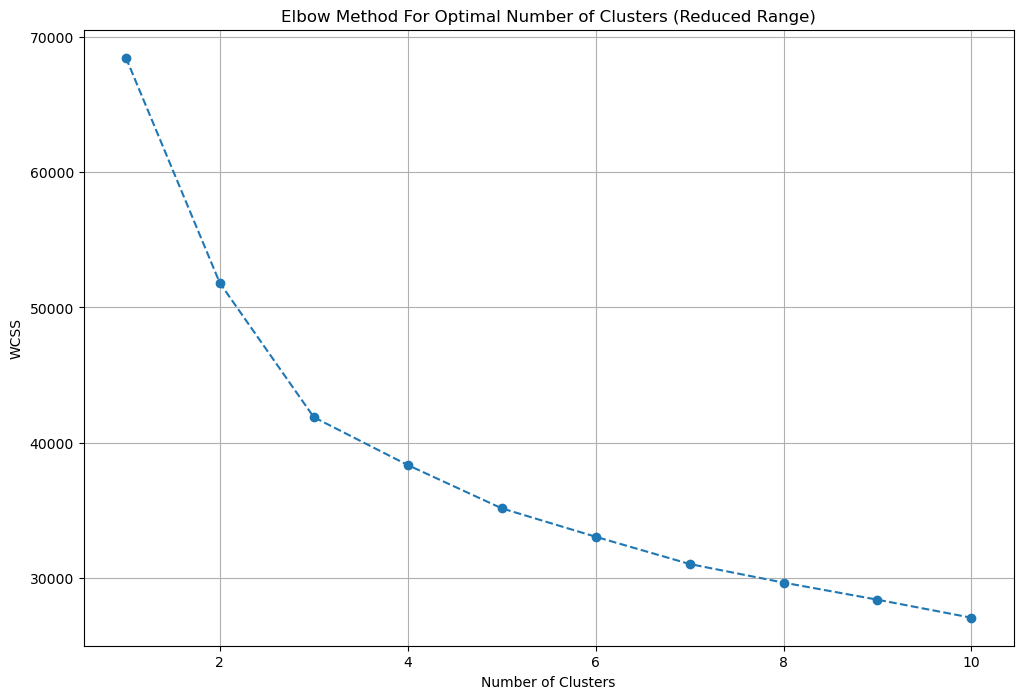

In [45]:
# Plot the results

plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [46]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [47]:
df = df.iloc[:,:-18]

In [48]:
df['furnishing_type'] = cluster_assignments

In [49]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1995,"['5 Fan', '5 Light', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
1137,"['3 Fan', '1 Exhaust Fan', '5 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
1058,"['1 Water Purifier', '7 Fan', '1 Exhaust Fan', '1 Dining Table', '3 Geyser', '5 Light', '3 AC', '1 Chimney', '4 Curtains', '1 Modular Kitchen', '1 TV', '6 Wardrobe', '2 Microwave', '1 Washing Machine', 'No Bed', 'No Fridge', 'No Sofa', 'No Stove']",0
3709,[],1
651,"['1 Water Purifier', '2 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '1 Geyser', '1 Stove', '4 Light', '1 Modular Kitchen', '1 TV', '2 AC', '1 Chimney', '1 Curtains', '1 Wardrobe', '1 Bed', '1 Sofa', '1 Microwave', '1 Washing Machine']",0


## 5.features

In [50]:
df[['society','features']].sample(5)

,society,features
2384,dlf royalton tower,['Visitor Parking']
1618,conscient elevate,NaN
74,signature global synera,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant']"
3154,dlf the ultima,"['Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3677,chd avenue,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


In [51]:
df['features'].isnull().sum()

635

In [52]:
# import the libraries and df

import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [53]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [54]:
temp_df = df[df['features'].isnull()]

In [55]:
temp_df.shape

(635, 26)

In [56]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [57]:
df.loc[temp_df.index,'features'] = x.values

In [58]:
df['features'].isnull().sum()

481

In [59]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [60]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [61]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1433,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
2918,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [62]:
features_binary_df.shape

(3803, 130)

In [63]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

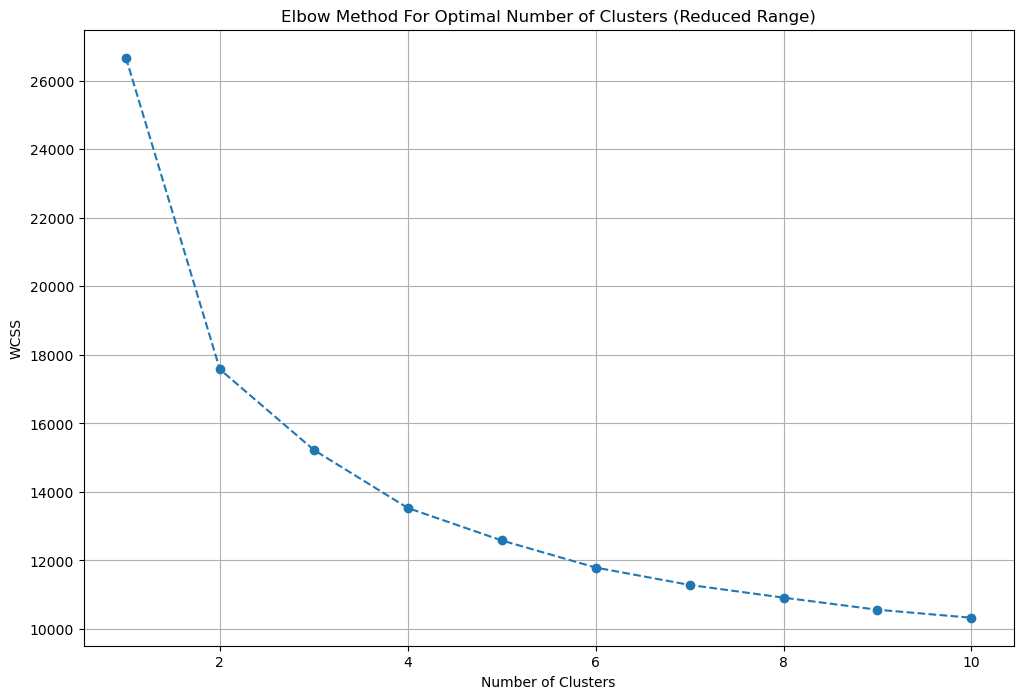

In [64]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [65]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [66]:
df['luxury_score'] = luxury_score

In [67]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,bestech altura,sector 79,1.85,8604.0,2150.0,Super Built up area 2150(199.74 sq.m.),3,4,3+,servant room,11.0,North,New Property,"['Sapphire 83 Mall', 'NH -8', 'Golf Course Extension Road', 'Mount Olympus Junior School', 'Amity University Gurugram', 'Miracles Apollo Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'Savoy Suites, Manesar', 'Golden Greens Golf & Resorts']","['5 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2150.0,NaN,NaN,0,1,0,0,0,1,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
1,flat,rof ananda,sector 95,0.46,6318.0,728.0,Carpet area: 728 (67.63 sq.m.),2,2,2,study room,11.0,North-West,New Property,"['Metro', 'Dwarka Expressway', 'Rajeev Chowk', 'NH8', 'KMP Expressway', 'IMT Manesar', 'ISBT', 'Hero Honda Chowk', 'IGI Airport', 'Railway Station', 'Proposed Diplomatic enclave', 'Flava', 'Spicy Salsa', ""Nihar's Cafe"", 'Cheeni singh restaurant']",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,728.0,1,0,0,0,0,1,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Lift(s), Maintenance Staff, No open drainage around, Bank Attached Property, Visitor Parking, Park, Security Personnel, Natural Light, Airy Rooms, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center]",82
2,house,independent,sector 9,0.22,7407.0,297.0,Carpet area: 33 (27.59 sq.m.),2,2,2,not available,1.0,NaN,Undefined,NaN,NaN,NaN,NaN,NaN,33.0,0,0,0,0,0,1,[],0
3,flat,umang monsoon breeze,sector 78,0.95,5491.0,1730.0,Built Up area: 1730 (160.72 sq.m.),3,3,2,not available,9.0,East,Relatively New,"['Proposed Metro Station', 'Mahapal Shing', 'National Highway 8', 'IGD Primary Health Care', 'HDFC Bank', 'PCL Logistics', 'JW Mariott']","['3 Fan', '1 Exhaust Fan', '2 Geyser', '7 Light', '1 Chimney', '1 Modular Kitchen', '3 Wardrobe', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,1730.0,NaN,0,0,0,0,0,2,"[Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, Swimming Pool, Park, Security Personnel, Internet/wi-fi connectivity, Fitness Centre / GYM, Club house / Community Center, Rain Water Harvesting]",65
4,flat,tata primanti,sector 72,4.00,13769.0,2905.0,Super Built up area 2905(269.88 sq.m.),4,5,2,servant room,7.0,South-East,Moderately Old,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']",[],"['Intercom Facility', '

In [68]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom

df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [69]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1950,flat,tata primanti,sector 72,3.20,12190.0,2625.0,Super Built up area 2625(243.87 sq.m.)Built Up area: 2600 sq.ft. (241.55 sq.m.)Carpet area: 2550 sq.ft. (236.9 sq.m.),4,4,3+,8.0,North,Moderately Old,2625.0,2600.0,2550.0,0,1,0,0,0,2,168
3071,flat,indiabulls centrum park,sector 103,2.14,7443.0,2875.0,Super Built up area 2875(267.1 sq.m.)Carpet area: 2550 sq.ft. (236.9 sq.m.),4,6,3+,7.0,East,Relatively New,2875.0,NaN,2550.0,0,1,0,0,0,1,142
3320,house,housing board colony,sector 28,2.10,23333.0,900.0,Plot area 100(83.61 sq.m.),8,8,3+,4.0,South-East,Moderately Old,NaN,900.0,NaN,0,0,0,0,1,2,38
1383,house,independent,sector 2,3.00,19268.0,1557.0,Plot area 173(144.65 sq.m.),6,4,3+,3.0,South,Old Property,NaN,1557.0,NaN,0,0,0,0,0,2,28
2084,flat,ireo victory valley,sector 67,3.05,16266.0,1875.0,Super Built up area 2385(221.57 sq.m.)Built Up area: 2200 sq.ft. (204.39 sq.m.)Carpet area: 1875 sq.ft. (174.19 sq.m.),3,4,2,35.0,South-West,Relatively New,2385.0,2200.0,1875.0,1,1,0,0,0,2,165


In [70]:
df.shape

(3803, 23)

In [71]:
# Export the datasets

df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)